# 1. BUSINESS UNDERSTANDING

### Objective

In [2]:
# importing our libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading our csv file into a pandas DataFrame:
data = pd.read_csv('german_credit_data.csv')

# 2. DATA UNDERSTANDING

In [4]:
# Displaying the first 5 entries of our dataset:
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [5]:
# Displaying the last 5 entries of our dataset:
data.tail()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad
999,999,27,male,2,own,moderate,moderate,4576,45,car,good


In [6]:
# Displaying a random entry in our dataset:
data.sample(3)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
439,439,26,female,0,own,little,rich,609,12,business,bad
955,955,57,female,3,rent,rich,little,1231,24,radio/TV,good
417,417,23,female,2,rent,NaN,little,8471,18,education,good


In [7]:
# Determining the shape of our dataset:
data.shape

(1000, 11)

In [8]:
# Checking the datatype of each column in our dataset:
data.dtypes

Unnamed: 0           int64
Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
dtype: object

In [9]:
# Displaying all the unique columns in our dataset:
data.columns.unique()

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [10]:
# Displaying the total number of unique values in each column:
data.nunique()

Unnamed: 0          1000
Age                   53
Sex                    2
Job                    4
Housing                3
Saving accounts        4
Checking account       3
Credit amount        921
Duration              33
Purpose                8
Risk                   2
dtype: int64

In [11]:
# Displaying the sum of missing values in each column:
data.isna().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [12]:
# Checking for duplicated entries in our dataset:
data.duplicated().any()

False

In [13]:
# Displaying a summary of common descriptive statistics in relation to our dataset:
data.describe(include='all')

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
count,1000.000000,1000.000000,1000,1000.000000,1000,817,606,1000.000000,1000.000000,1000,1000
unique,NaN,NaN,2,NaN,3,4,3,NaN,NaN,8,2
top,NaN,NaN,male,NaN,own,little,little,NaN,NaN,car,good
freq,NaN,NaN,690,NaN,713,603,274,NaN,NaN,337,700
mean,499.500000,35.546000,NaN,1.904000,NaN,NaN,NaN,3271.258000,20.903000,NaN,NaN
std,288.819436,11.375469,NaN,0.653614,NaN,NaN,NaN,2822.736876,12.058814,NaN,NaN
min,0.000000,19.000000,NaN,0.000000,NaN,NaN,NaN,250.000000,4.000000,NaN,NaN
25%,249.750000,27.000000,NaN,2.000000,NaN,NaN,NaN,1365.500000,12.000000,NaN,NaN
50%,499.500000,33.000000,NaN,2.000000,NaN,NaN,NaN,2319.500000,18.000000,NaN,NaN
75%,749.250000,42.000000,NaN,2.000000,NaN,NaN,NaN,3972.250000,24.000000,NaN,NaN


In [14]:
# Summary of our dataset's metadata:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


# 3. DATA WRANGLING

In [15]:
# Dropping the 'Unnamed: 0' column in our dataset:
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [16]:
# Displaying all the unique values in the 'Saving accounts' column:
data['Saving accounts'].unique()

array([nan, 'little', 'quite rich', 'rich', 'moderate'], dtype=object)

In [17]:
# Replacing missing values in the 'Saving accounts' with the most common value:
data['Saving accounts'].fillna(data['Saving accounts'].mode()[0], inplace=True)

In [18]:
# Displaying all the unique values in the 'Checking account' column:
data['Checking account'].unique()

array(['little', 'moderate', nan, 'rich'], dtype=object)

In [19]:
# Imputing the missing values in 'Checking account' with the most common value:
data['Checking account'].fillna(data['Checking account'].mode()[0], inplace=True)

# 4. EXPLORATORY DATA ANALYSIS

##### Age Variable

In [20]:
from scipy.stats import skew, kurtosis

In [21]:
print(f"Minimum age in dataset: {data['Age'].min()}")
print(f"Maximum age in dataset: {data['Age'].max()}")
print(f"Mean age in dataset: {data['Age'].mean()}")
print(f"Most frequent age in dataset: {data['Age'].mode()}")
print(f"Median age in dataset: {data['Age'].median()}")
print(f"Skewness of age in dataset: {data['Age'].skew()}")
print(f"Kurtosis of age in dataset: {data['Age'].kurtosis()}")

Minimum age in dataset: 19
Maximum age in dataset: 75
Mean age in dataset: 35.546
Most frequent age in dataset: 0    27
dtype: int64
Median age in dataset: 33.0
Skewness of age in dataset: 1.0207392686768317
Kurtosis of age in dataset: 0.5957795670766881


In [22]:
bins = np.linspace(data['Age'].min(), data['Age'].max(), 10)
bins

array([19.        , 25.22222222, 31.44444444, 37.66666667, 43.88888889,
       50.11111111, 56.33333333, 62.55555556, 68.77777778, 75.        ])

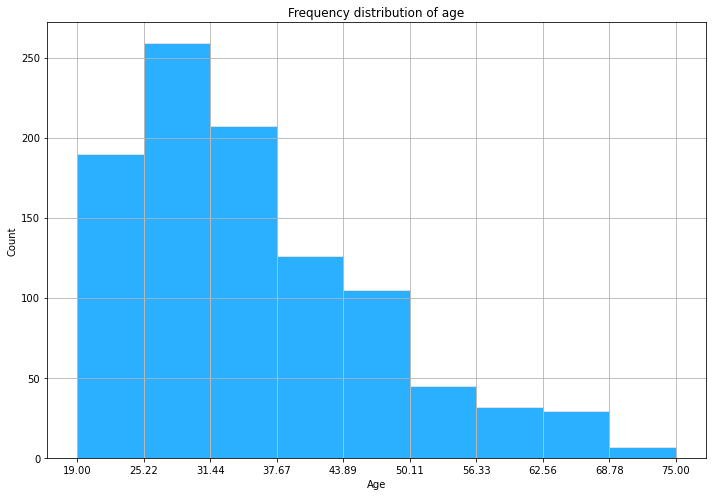

In [23]:
fig, axs = plt.subplots(figsize=(10, 7), tight_layout=True)

plt.hist(data['Age'], bins=bins, facecolor='#2ab0ff',edgecolor='#e0e0e0')


axs.set_xticks(bins)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Frequency distribution of age')
plt.grid()
plt.show()

<AxesSubplot:xlabel='Age'>

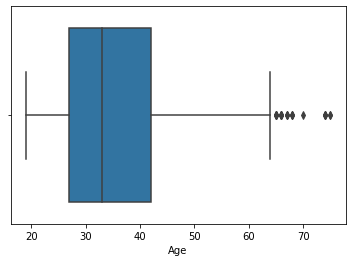

In [24]:
sns.boxplot(x=data['Age'])

##### Sex Variable

<AxesSubplot:xlabel='Sex', ylabel='count'>

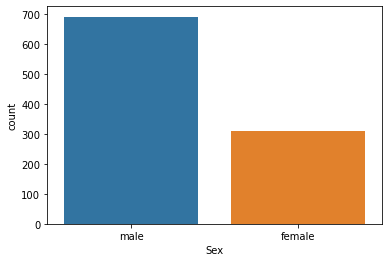

In [25]:
# Countplot for gender:
sns.countplot(x = data['Sex'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

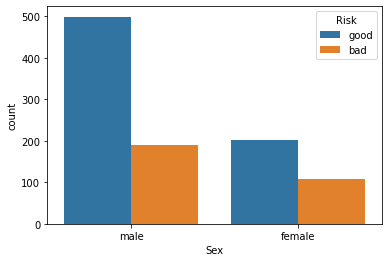

In [26]:
# Count plot for gender in comparison to risk:
sns.countplot(x=data['Sex'], hue=data['Risk'])

##### Job Variable

In [27]:
# Unique values for the 'Job' column:
data['Job'].unique()

array([2, 1, 3, 0], dtype=int64)

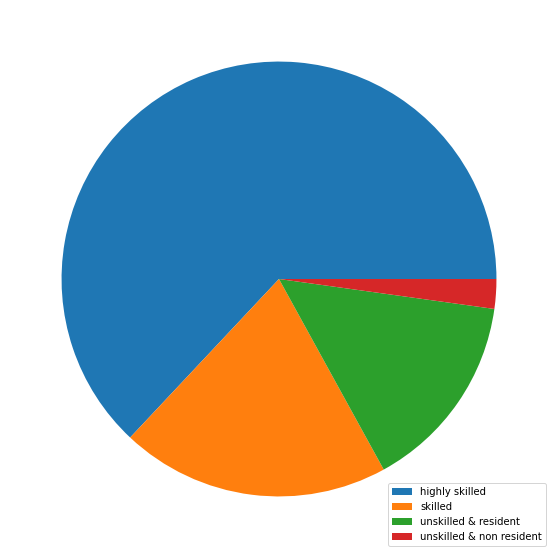

In [28]:
plt.figure(figsize = (10, 10))
colors = sns.color_palette('pastel')[0:5]
pie_data = list(data['Job'].value_counts(ascending=False))
labels = ['highly skilled', 'skilled', 'unskilled & resident', 'unskilled & non resident']
plt.pie(x=pie_data)
plt.legend(labels)
plt.show()

<AxesSubplot:xlabel='Job', ylabel='count'>

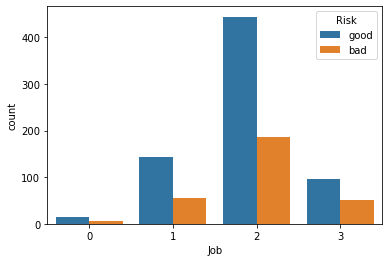

In [29]:
sns.countplot(x=data['Job'], hue=data['Risk'])

##### Housing Variable

In [30]:
data['Housing'].unique()

array(['own', 'free', 'rent'], dtype=object)

<AxesSubplot:xlabel='Housing', ylabel='count'>

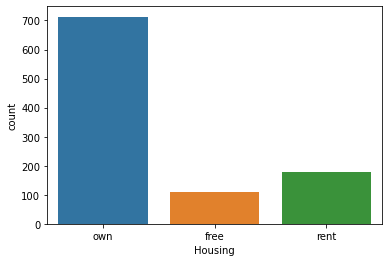

In [31]:
sns.countplot(x=data['Housing'])

<AxesSubplot:xlabel='count', ylabel='Housing'>

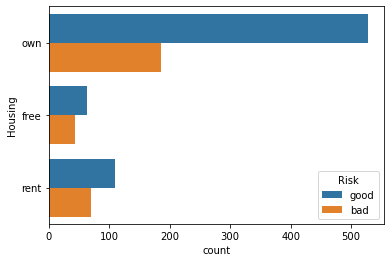

In [32]:
sns.countplot(y=data['Housing'], hue=data['Risk'])

##### Savings Account Variable

In [33]:
data['Saving accounts'].unique()

array(['little', 'quite rich', 'rich', 'moderate'], dtype=object)

<AxesSubplot:xlabel='Saving accounts', ylabel='count'>

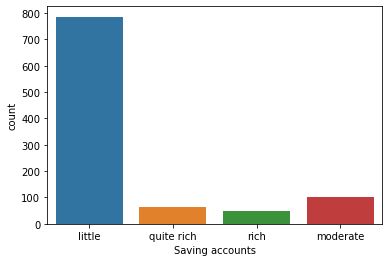

In [34]:
sns.countplot(x=data['Saving accounts'])

<AxesSubplot:xlabel='Saving accounts', ylabel='count'>

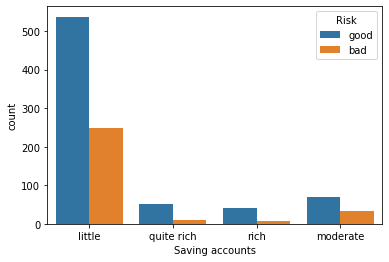

In [35]:
# Countplot for 'Saving accounts' and credit risk
sns.countplot(x=data['Saving accounts'], hue=data['Risk'])

##### Checking Account Variable

In [36]:
data['Checking account'].unique()

array(['little', 'moderate', 'rich'], dtype=object)

<AxesSubplot:xlabel='count', ylabel='Checking account'>

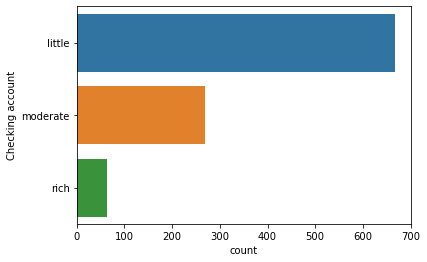

In [37]:
# Countplot for the 'Checking Account' variable:
sns.countplot(y=data['Checking account'])

<AxesSubplot:xlabel='Checking account', ylabel='count'>

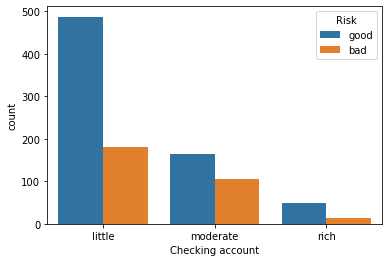

In [38]:
sns.countplot(x=data['Checking account'], hue=data['Risk'])

##### Credit Amount Variable

In [39]:
data['Credit amount'].dtype

dtype('int64')

In [40]:
print(f"Minimum Credit amount in dataset: {data['Credit amount'].min()}")
print(f"Maximum Credit amount in dataset: {data['Credit amount'].max()}")
print(f"Mean Credit amount in dataset: {data['Credit amount'].mean()}")
print(f"Most frequent Credit amount in dataset: {data['Credit amount'].mode()}")
print(f"Median Credit amount in dataset: {data['Credit amount'].median()}")
print(f"Skewness of Credit amount in dataset: {data['Credit amount'].skew()}")
print(f"Kurtosis of Credit amount in dataset: {data['Credit amount'].kurtosis()}")

Minimum Credit amount in dataset: 250
Maximum Credit amount in dataset: 18424
Mean Credit amount in dataset: 3271.258
Most frequent Credit amount in dataset: 0    1258
1    1262
2    1275
3    1393
4    1478
dtype: int64
Median Credit amount in dataset: 2319.5
Skewness of Credit amount in dataset: 1.9496276798326209
Kurtosis of Credit amount in dataset: 4.29259030804851


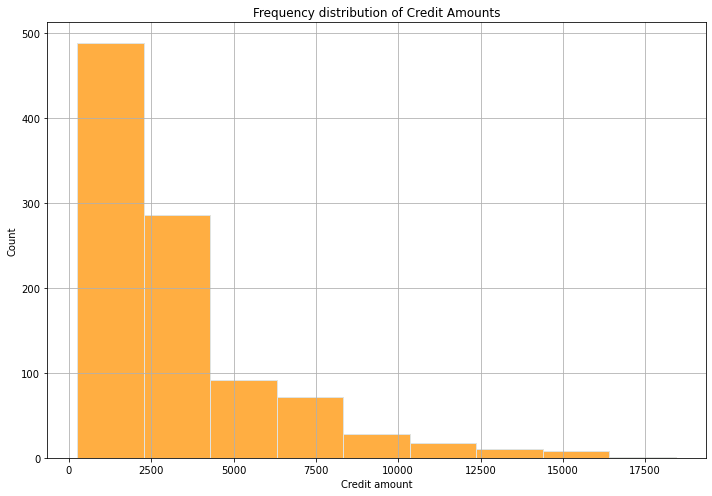

In [41]:
# Histogram to show the distribution of credit amounts in the dataset:
bins_numbers = np.linspace(data['Credit amount'].min(), data['Credit amount'].max(), 10)

fig1, ax = plt.subplots(figsize=(10, 7), tight_layout=True)

plt.hist(data['Credit amount'], bins=bins_numbers, facecolor='#ffae42',edgecolor='#e0e3e0')


axs.set_xticks(bins_numbers)
plt.xlabel('Credit amount')
plt.ylabel('Count')
plt.title('Frequency distribution of Credit Amounts')
plt.grid()
plt.show()

<AxesSubplot:xlabel='Credit amount'>

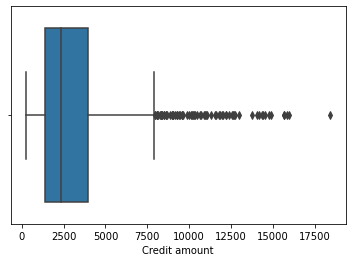

In [42]:
# Boxplot to show the distribution of credit amounts.
sns.boxplot(x=data['Credit amount'])

##### Duration Variable

In [43]:
data['Duration'].unique()

array([ 6, 48, 12, 42, 24, 36, 30, 15,  9, 10,  7, 60, 18, 45, 11, 27,  8,
       54, 20, 14, 33, 21, 16,  4, 47, 13, 22, 39, 28,  5, 26, 72, 40],
      dtype=int64)

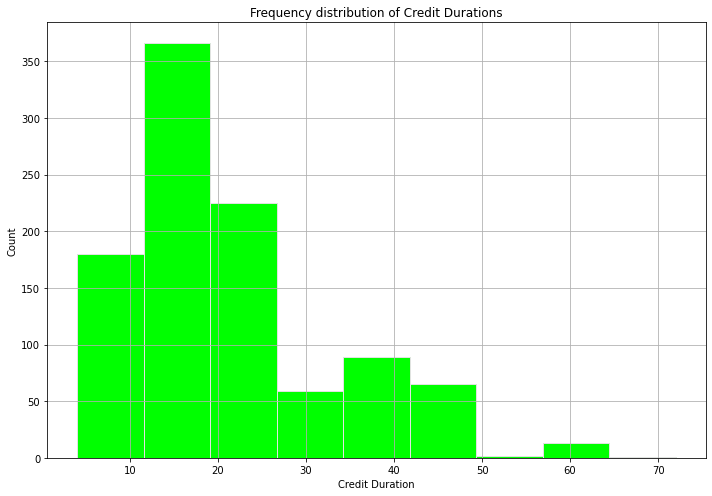

In [44]:
# Histogram to show the distribution of credit durations in the dataset:
bins_numbers_durations = np.linspace(data['Duration'].min(), data['Duration'].max(), 10)

fig2, axes = plt.subplots(figsize=(10, 7), tight_layout=True)

plt.hist(data['Duration'], bins=bins_numbers_durations, facecolor='#00ff00',edgecolor='#e0e3e0')


axs.set_xticks(bins_numbers_durations)
plt.xlabel('Credit Duration')
plt.ylabel('Count')
plt.title('Frequency distribution of Credit Durations')
plt.grid()
plt.show()

##### Purpose Variable

In [45]:
data['Purpose'].unique()

array(['radio/TV', 'education', 'furniture/equipment', 'car', 'business',
       'domestic appliances', 'repairs', 'vacation/others'], dtype=object)

<AxesSubplot:xlabel='count', ylabel='Purpose'>

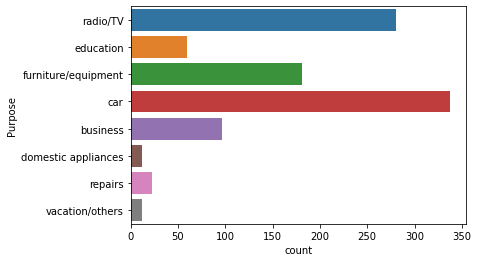

In [46]:
sns.countplot(y=data['Purpose'])

<AxesSubplot:xlabel='Risk', ylabel='count'>

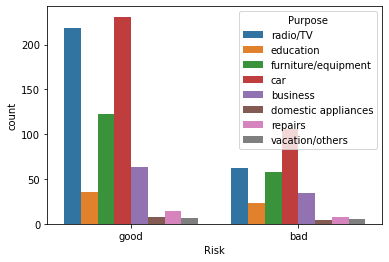

In [47]:
# Countplot for credit risk in relation to purpose:
sns.countplot(x=data['Risk'], hue=data['Purpose'])

In [48]:
# Correlation matrix for our dataset:
data.corr()

,Age,Job,Credit amount,Duration
Age,1.000000,0.015673,0.032716,-0.036136
Job,0.015673,1.000000,0.285385,0.210910
Credit amount,0.032716,0.285385,1.000000,0.624984
Duration,-0.036136,0.210910,0.624984,1.000000


In [49]:
import scorecardpy as sc

In [50]:
data_bins = sc.woebin(data, 'Risk')

[INFO] creating woe binning ...
Binning on 1000 rows and 10 columns in 00:00:13


{'Duration': <Figure size 432x288 with 2 Axes>,
 'Credit amount': <Figure size 432x288 with 2 Axes>,
 'Age': <Figure size 432x288 with 2 Axes>,
 'Housing': <Figure size 432x288 with 2 Axes>,
 'Purpose': <Figure size 432x288 with 2 Axes>,
 'Sex': <Figure size 432x288 with 2 Axes>,
 'Checking account': <Figure size 432x288 with 2 Axes>,
 'Saving accounts': <Figure size 432x288 with 2 Axes>,
 'Job': <Figure size 432x288 with 2 Axes>}

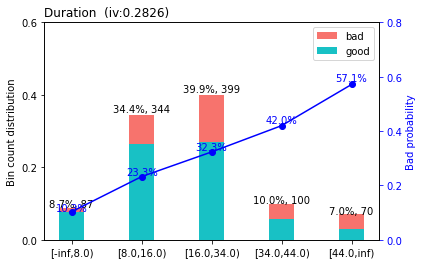

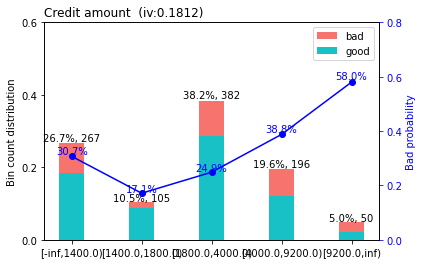

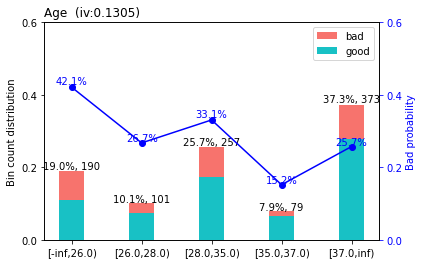

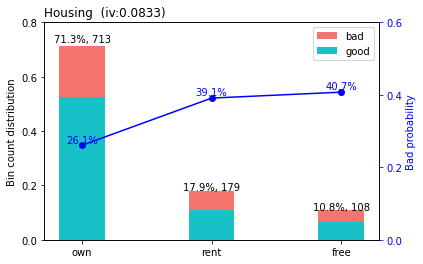

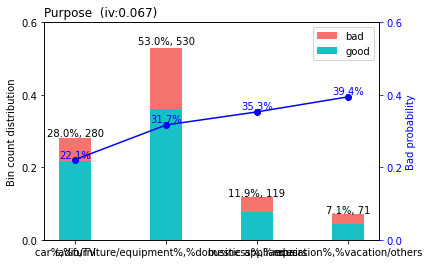

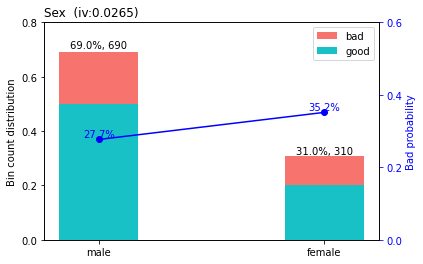

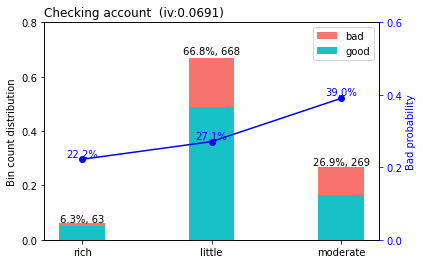

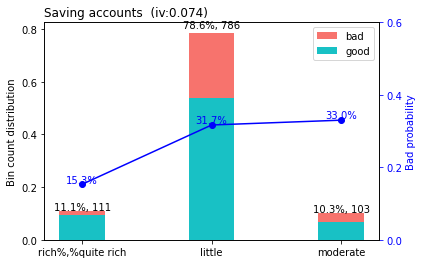

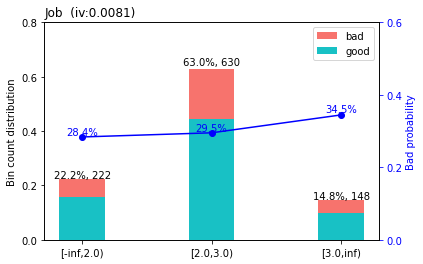

In [51]:
sc.woebin_plot(data_bins)

# 5. DATA PREPROCESSING AND FEATURE ENGINEERING

In [52]:
# Implementing the label encoding technique on our target column:
from sklearn.preprocessing import LabelEncoder
labels = LabelEncoder()
target_transformed = labels.fit_transform(data['Risk'])

In [53]:
target_transformed

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [54]:
data.drop('Risk', axis=1)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,little,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,little,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,little,1736,12,furniture/equipment
996,40,male,3,own,little,little,3857,30,car
997,38,male,2,own,little,little,804,12,radio/TV
998,23,male,2,free,little,little,1845,45,radio/TV


In [55]:
data['Risk'] = target_transformed

In [56]:
data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,little,little,1169,6,radio/TV,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,0
2,49,male,1,own,little,little,2096,12,education,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,53,male,2,free,little,little,4870,24,car,0
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,little,1736,12,furniture/equipment,1
996,40,male,3,own,little,little,3857,30,car,1
997,38,male,2,own,little,little,804,12,radio/TV,1
998,23,male,2,free,little,little,1845,45,radio/TV,0


In [57]:
from category_encoders import BinaryEncoder
binary = BinaryEncoder()
binary_data = binary.fit_transform(data[['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']])

In [58]:
binary_data

,Sex_0,Sex_1,Housing_0,Housing_1,Saving accounts_0,Saving accounts_1,Saving accounts_2,Checking account_0,Checking account_1,Purpose_0,Purpose_1,Purpose_2,Purpose_3
0,0,1,0,1,0,0,1,0,1,0,0,0,1
1,1,0,0,1,0,0,1,1,0,0,0,0,1
2,0,1,0,1,0,0,1,0,1,0,0,1,0
3,0,1,1,0,0,0,1,0,1,0,0,1,1
4,0,1,1,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,0,1,0,0,1,0,1,0,0,1,1
996,0,1,0,1,0,0,1,0,1,0,1,0,0
997,0,1,0,1,0,0,1,0,1,0,0,0,1
998,0,1,1,0,0,0,1,0,1,0,0,0,1


In [59]:
mini_dataset = data[['Age', 'Job', 'Credit amount', 'Duration', 'Risk']]
mini_dataset

,Age,Job,Credit amount,Duration,Risk
0,67,2,1169,6,1
1,22,2,5951,48,0
2,49,1,2096,12,1
3,45,2,7882,42,1
4,53,2,4870,24,0
...,...,...,...,...,...
995,31,1,1736,12,1
996,40,3,3857,30,1
997,38,2,804,12,1
998,23,2,1845,45,0


In [60]:
final_data = pd.concat([binary_data, mini_dataset], axis=1)
final_data

,Sex_0,Sex_1,Housing_0,Housing_1,Saving accounts_0,Saving accounts_1,Saving accounts_2,Checking account_0,Checking account_1,Purpose_0,Purpose_1,Purpose_2,Purpose_3,Age,Job,Credit amount,Duration,Risk
0,0,1,0,1,0,0,1,0,1,0,0,0,1,67,2,1169,6,1
1,1,0,0,1,0,0,1,1,0,0,0,0,1,22,2,5951,48,0
2,0,1,0,1,0,0,1,0,1,0,0,1,0,49,1,2096,12,1
3,0,1,1,0,0,0,1,0,1,0,0,1,1,45,2,7882,42,1
4,0,1,1,0,0,0,1,0,1,0,1,0,0,53,2,4870,24,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,0,1,0,0,1,0,1,0,0,1,1,31,1,1736,12,1
996,0,1,0,1,0,0,1,0,1,0,1,0,0,40,3,3857,30,1
997,0,1,0,1,0,0,1,0,1,0,0,0,1,38,2,804,12,1
998,0,1,1,0,0,0,1,0,1,0,0,0,1,23,2,1845,45,0


# 6. MODELLING

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
# Defining our study and predictor variables:
X = final_data.drop('Risk', axis=1)
y = final_data['Risk']

In [63]:
# Splitting our data into a training set and a testing set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
# Defining an instance of the LogisticRegression class:
model = LogisticRegression()

In [66]:
# Training our regression model:
model.fit(X_train, y_train)

LogisticRegression()

In [67]:
# Viewing our predictions:
model.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1])

In [68]:
# Testing the accuracy of our model:
model.score(X_test, y_test)

0.7